# Formatting Labelled Data

In [2]:
import pandas as pd
import numpy as np
import datetime as dt 
import matplotlib.pyplot as plt

In [3]:
def grab_labelled_data(data_path, label_begins = 98): 
  labelled = pd.read_csv(data_path)
  label_begins = 98

  features = labelled.iloc[:, 2:label_begins] 
  labels = labelled.iloc[:, label_begins:]
  ids = labelled.iloc[:, :2]

  labels.columns = [x[10:] for x in labels.columns]

  features = features.join(ids)
  labels = labels.join(ids)

  features.columns.name = 'Time' 
  labels.columns.name = 'Time'

  features = features.pivot_table(index = ['Student ID', 'Date'])
  labels = labels.pivot_table(index = ['Student ID', 'Date'])

  features = pd.DataFrame(features.stack()).reset_index()
  labels = pd.DataFrame(labels.stack()).reset_index()

  time_stamps = features['Date'] + " " + features['Time']
  time_stamps = pd.to_datetime(time_stamps)

  features['Datetime'] = time_stamps
  labels['Datetime'] = time_stamps

  features = features.drop(columns = ['Date', 'Time'] ) 
  labels = labels.drop(columns = ['Date', 'Time'])

  features = features.pivot_table(index = ['Student ID', 'Datetime']) 
  labels = labels.pivot_table(index = ['Student ID', 'Datetime'])

  features.columns = ['Steps'] 
  labels.columns = ['Asleep']

  labelled_data = features.join(labels)

  return labelled_data 

In [4]:
labelled_data = grab_labelled_data('./BMCM_steps_sleep.csv')

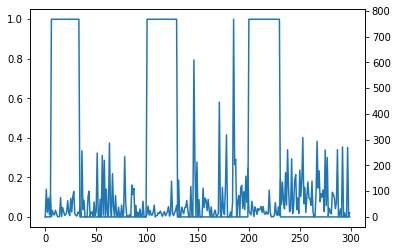

In [5]:
f, ax1 = plt.subplots() 
ax1.plot(np.array(labelled_data['Asleep'])[:300]) 

ax2 = ax1.twinx() 
ax2.plot(np.array(labelled_data['Steps'])[:300])

No handles with labels found to put in legend.


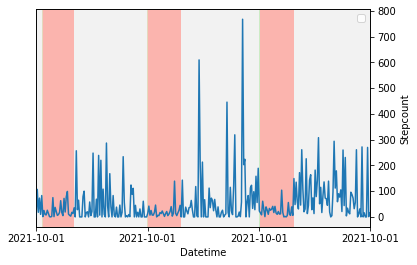

In [6]:
f, ax = plt.subplots() 

ax2 = ax.twinx() 
labels = np.reshape(np.array(labelled_data['Asleep'])[:300], (1,-1))
ax.imshow(1 - labels, aspect = 'auto', cmap = 'Pastel1')

ax2.plot(np.array(labelled_data['Steps'])[:300])

ax.set_xticks([100*x for x in range(0,4)])
ax.set_xticklabels([x.date() for x in labelled_data.loc[0].iloc[:300].index])

ax.set_yticks([])

ax.set_xlabel("Datetime") 
ax2.set_ylabel("Stepcount")

ax2.legend()

plt.savefig("StepcountAgainstSleep.png")

In [7]:
labelled_data.loc[0].iloc[:300].index

DatetimeIndex(['2021-10-01 00:00:00', '2021-10-01 00:15:00',
               '2021-10-01 00:30:00', '2021-10-01 00:45:00',
               '2021-10-01 01:00:00', '2021-10-01 01:15:00',
               '2021-10-01 01:30:00', '2021-10-01 01:45:00',
               '2021-10-01 02:00:00', '2021-10-01 02:15:00',
               ...
               '2021-10-04 00:30:00', '2021-10-04 00:45:00',
               '2021-10-04 01:00:00', '2021-10-04 01:15:00',
               '2021-10-04 01:30:00', '2021-10-04 01:45:00',
               '2021-10-04 02:00:00', '2021-10-04 02:15:00',
               '2021-10-04 02:30:00', '2021-10-04 02:45:00'],
              dtype='datetime64[ns]', name='Datetime', length=300, freq=None)

In [8]:
labelled_data

Steps  Asleep
Student ID Datetime                          
0          2021-10-01 00:00:00      0       0
           2021-10-01 00:15:00    107       0
           2021-10-01 00:30:00     18       0
           2021-10-01 00:45:00     73       0
           2021-10-01 01:00:00     10       0
...                               ...     ...
99         2021-10-31 22:45:00     56       0
           2021-10-31 23:00:00    450       0
           2021-10-31 23:15:00     56       0
           2021-10-31 23:30:00     11       0
           2021-10-31 23:45:00      4       0

[297600 rows x 2 columns]

In [9]:
labelled_data.corr()

,Steps,Asleep
Steps,1.000000,-0.197233
Asleep,-0.197233,1.000000


# Formatting Unlabelled Data

In [10]:
def grab_unlabelled_data(data_path): 
  unlabelled = pd.read_csv(data_path) 
  unlabelled = unlabelled.pivot_table(index = ['Student ID', 'Date'])
  unlabelled.columns.name = 'Time'
  unlabelled = pd.DataFrame(unlabelled.stack())
  unlabelled = unlabelled.reset_index()
  unlabelled['Datetime'] = pd.to_datetime(unlabelled['Date'] + ' ' + unlabelled['Time'])
  unlabelled = unlabelled.drop(columns = ['Date', 'Time'])
  unlabelled = unlabelled.pivot_table(index = ['Student ID', 'Datetime'])
  unlabelled.columns = ['Steps']

  return unlabelled 

In [11]:
unlabelled_data = grab_unlabelled_data('./BMCM_steps.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f427b354350>]],
      dtype=object)

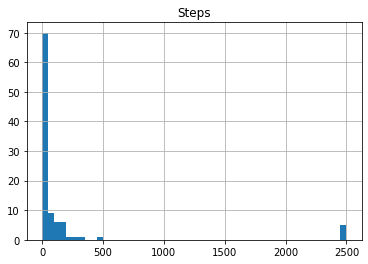

In [12]:
unlabelled_data.loc[100].iloc[:100].hist(bins = 50)

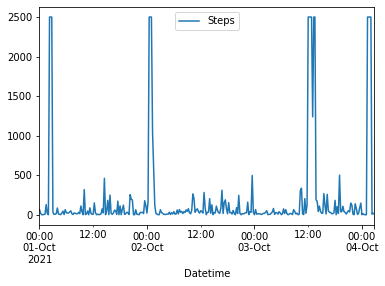

In [13]:
unlabelled_data.loc[100].iloc[:300].plot()

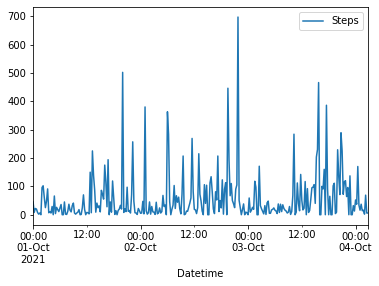

In [14]:
unlabelled_data.loc[302].iloc[:300].plot()

# Inspecting Labelled Data to Characterize Emission Functions in HMM

In [15]:
asleep_data = labelled_data[labelled_data['Asleep'] == 1]
awake_data = labelled_data[labelled_data['Asleep'] == 0]

In [16]:
asleep_data

Steps  Asleep
Student ID Datetime                          
0          2021-10-01 01:30:00      1       1
           2021-10-01 01:45:00     25       1
           2021-10-01 02:00:00      9       1
           2021-10-01 02:15:00      8       1
           2021-10-01 02:30:00     26       1
...                               ...     ...
99         2021-10-31 06:15:00      3       1
           2021-10-31 06:30:00      7       1
           2021-10-31 06:45:00     20       1
           2021-10-31 07:00:00     26       1
           2021-10-31 07:15:00     17       1

[99884 rows x 2 columns]

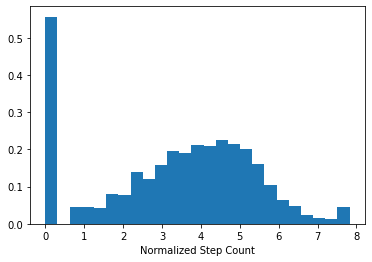

In [17]:
plt.hist(np.log(awake_data['Steps'] + 1), bins = 25, density = True)
plt.xlabel("Normalized Step Count")

plt.savefig("LogStepsHistWhileWake.png")

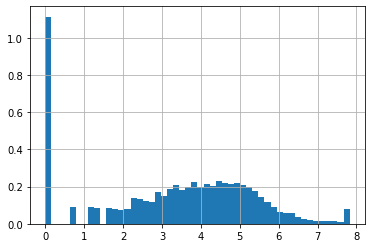

In [18]:
np.log(awake_data['Steps'] + 1).hist(bins = 50, density = True)

# Inspecting Labelled Data for Priors in HMM

In [19]:
only_midnights = labelled_data.reset_index()[labelled_data.reset_index()['Datetime'].apply(lambda x: x.time()) == dt.time(0,0)]

In [20]:
only_midnights['Asleep'].mean()

0.35838709677419356

In [21]:
id = 0
labels = labelled_data.loc[id]['Asleep']
wake_to_wake = (labels == 0) * (labels.shift(1) == 0)

/usr/local/lib/python3.7/dist-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


In [22]:
num_waking_epochs = (labels == 0).sum()
num_sleeping_epochs = (labels == 1).sum()
num_wake_to_wake = ((labels == 0) * (labels.shift(1) == 0)).sum()
num_wake_to_sleep = ((labels == 1) * (labels.shift(1) == 0)).sum()
num_sleep_to_wake = ((labels == 0) * (labels.shift(1) == 1)).sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/usr/local/lib/python3.7/dist-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/usr/local/lib/python3.7/dist-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


In [23]:
num_sleep_to_wake / num_sleeping_epochs

0.03873598369011213

In [24]:
asleep_log_steps = np.log(1 + asleep_data['Steps'])
awake_log_steps = np.log(1 + awake_data['Steps'])

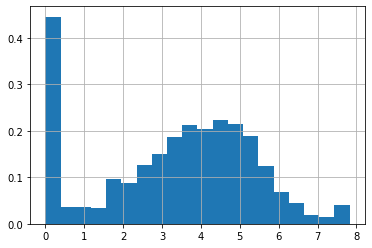

In [25]:
awake_log_steps.hist(bins = 20, density = True)

In [26]:
from sklearn import mixture

In [27]:
awake_data

Steps  Asleep
Student ID Datetime                          
0          2021-10-01 00:00:00      0       0
           2021-10-01 00:15:00    107       0
           2021-10-01 00:30:00     18       0
           2021-10-01 00:45:00     73       0
           2021-10-01 01:00:00     10       0
...                               ...     ...
99         2021-10-31 22:45:00     56       0
           2021-10-31 23:00:00    450       0
           2021-10-31 23:15:00     56       0
           2021-10-31 23:30:00     11       0
           2021-10-31 23:45:00      4       0

[197716 rows x 2 columns]

In [28]:
clf_sleep = mixture.GaussianMixture(n_components = 2) 
clf_sleep.fit(np.array(asleep_log_steps).reshape(-1,1))

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [29]:
import scipy.stats as stats 

In [30]:
clf_sleep.covariances_

array([[[0.53197021]],

       [[0.71566975]]])

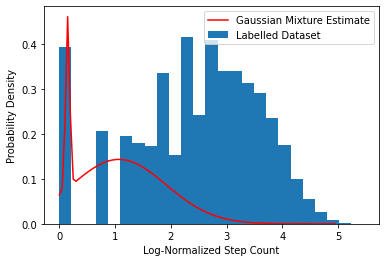

In [31]:
variances = clf_sleep.covariances_.flatten()
means = clf_sleep.means_.flatten()
weights = clf_sleep.weights_.flatten()

distr_0 = stats.norm(loc = means[0], scale = variances[0]**0.5) 
distr_1 = stats.norm(loc = means[1], scale = variances[1] ** 0.5) 

plt.plot([0.05 * x for x in range(0, 100)], [weights[0] * distr_0.pdf(x) + weights[1] * distr_1.pdf(0.05 * x) for x in range(0, 100)], color = "red", label = "Gaussian Mixture Estimate")
plt.hist(asleep_log_steps, bins = 25, density = True, label = "Labelled Dataset")  

plt.xlabel("Log-Normalized Step Count") 
plt.ylabel("Probability Density") 
plt.legend()

plt.savefig("PriorGMMForSleepEmission.png")

In [32]:
clf_wake = mixture.GaussianMixture(n_components = 2) 
clf_wake.fit(np.array(awake_log_steps).reshape(-1,1))

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [33]:
clf_wake.means_

array([[0.        ],
       [4.02326008]])

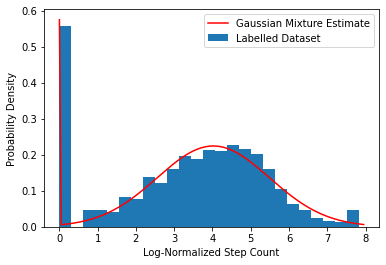

In [34]:
variances = clf_wake.covariances_.flatten()
means = clf_wake.means_.flatten()
weights = clf_wake.weights_.flatten()

distr_0 = stats.norm(loc = means[0], scale = variances[0]**0.5) 
distr_1 = stats.norm(loc = means[1], scale = variances[1] ** 0.5) 

xs = [0.0031] + [0.05 * x for x in range(1, 160)]

plt.plot(xs, [weights[0] * distr_0.pdf(x) + weights[1] * distr_1.pdf(x) for x in xs], color = "red", label = "Gaussian Mixture Estimate")
plt.hist(awake_log_steps, bins = 25, density = True, label = "Labelled Dataset")  

plt.xlabel("Log-Normalized Step Count") 
plt.ylabel("Probability Density") 
plt.legend()

plt.savefig("PriorGMMForAwakeEmission.png")

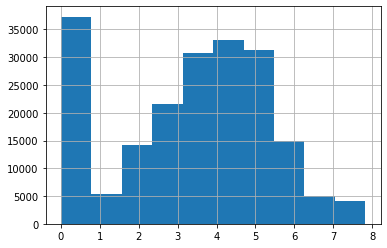

In [35]:
awake_log_steps.hist()

# Data Graphics

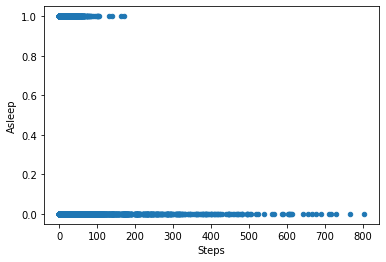

In [36]:
labelled_data.iloc[:3000].plot.scatter(x = 'Steps', y = 'Asleep')

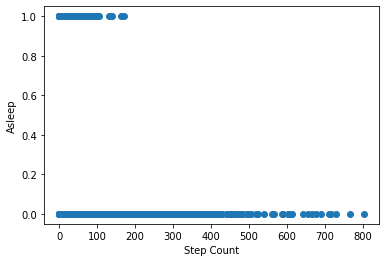

In [37]:
plt.scatter(x = labelled_data.iloc[:3000]['Steps'], y = labelled_data.iloc[:3000]['Asleep'])
plt.xlabel('Step Count') 
plt.ylabel('Asleep')
plt.savefig("Scatter_Steps_Sleep.png")

In [38]:
theta = np.array([-0.002, -0.000, -0.005, -0.003, -0.011, -0.011, -0.036])
b = np.array([1.940])

In [39]:
xs = [np.array([500, 500, 500, 500, x, 500, 500]) for x in range(0, 800)]

In [40]:
ys = [1 / (1 + np.exp(- np.dot(theta, x) - b)) for x in xs]

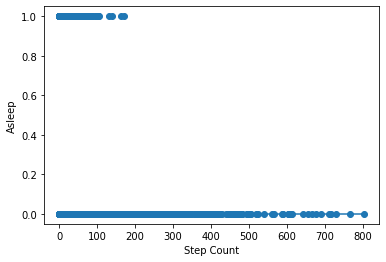

In [41]:
plt.scatter(x = labelled_data.iloc[:3000]['Steps'], y = labelled_data.iloc[:3000]['Asleep'])
plt.xlabel('Step Count') 
plt.ylabel('Asleep')
plt.plot(ys) 
plt.show()

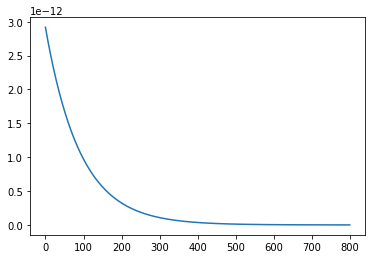

In [42]:
plt.plot(ys)

In [55]:
unlabelled_data[0:50]

Steps
Student ID Datetime                  
100        2021-10-01 00:00:00     67
           2021-10-01 00:15:00     20
           2021-10-01 00:30:00      0
           2021-10-01 00:45:00      0
           2021-10-01 01:00:00      3
           2021-10-01 01:15:00      7
           2021-10-01 01:30:00    128
           2021-10-01 01:45:00     16
           2021-10-01 02:00:00      1
           2021-10-01 02:15:00   2500
           2021-10-01 02:30:00   2500
           2021-10-01 02:45:00   2500
           2021-10-01 03:00:00     32
           2021-10-01 03:15:00      5
           2021-10-01 03:30:00      6
           2021-10-01 03:45:00     13
           2021-10-01 04:00:00     85
           2021-10-01 04:15:00      8
           2021-10-01 04:30:00      6
           2021-10-01 04:45:00      1
           2021-10-01 05:00:00     21
           2021-10-01 05:15:00     45
           2021-10-01 05:30:00      2
           2021-10-01 05:45:00     64
           2021-10-01 06:00:00     25
           2021-10-01 06:15:00     22
           2021-10-01 06:30:00     21
           2021-10-01 06:45:00     35
           2021-10-01 07:00:00     49
           2021-10-01 07:15:00     12
           2021-10-01 07:30:00      2
           2021-10-01 07:45:00     23
           2021-10-01 08:00:00     17
           2021-10-01 08:15:00     12
           2021-10-01 08:30:00     12
           2021-10-01 08:45:00     30
           2021-10-01 09:00:00     13
           2021-10-01 09:15:00    110
           2021-10-01 09:30:00     37
           2021-10-01 09:45:00      0
           2021-10-01 10:00:00    318
           2021-10-01 10:15:00      2
           2021-10-01 10:30:00      9
           2021-10-01 10:45:00     46
           2021-10-01 11:00:00      0
           2021-10-01 11:15:00     87
           2021-10-01 11:30:00     18
           2021-10-01 11:45:00      5
           2021-10-01 12:00:00      7
           2021-10-01 12:15:00    149

In [58]:
unlabelled_lab = pd.read_csv("CNN_Predictions_On_Unlabelled.csv")
unlabelled_lab

,Student ID,Datetime,Steps,Asleep
0,100,2021-10-01 00:00:00,67,0.0
1,100,2021-10-01 00:15:00,20,0.0
2,100,2021-10-01 00:30:00,0,0.0
3,100,2021-10-01 00:45:00,0,0.0
4,100,2021-10-01 01:00:00,3,0.0
...,...,...,...,...
1190395,499,2021-10-31 22:45:00,7,0.0
1190396,499,2021-10-31 23:00:00,41,0.0
1190397,499,2021-10-31 23:15:00,6,0.0
1190398,499,2021-10-31 23:30:00,5,0.0


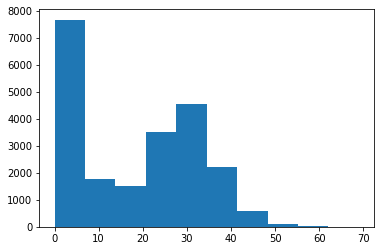

In [59]:
def generate_three_labels_hist(labelled_data):
  previous = 1.0
  count = 0.0
  lengths = []
  #three_labels = []
  for index, row in labelled_data.iterrows():
    current = row['Asleep'] #name of the column of 
    if current == 1.0:
      count += 1.0
    elif previous == 1.0 and current == 0.0:
      lengths.append(count)
      #if count <= 12:
      #  three_labels.extend([2.0]*int(count))
      #else:
      #  three_labels.extend([1.0]*int(count))
      count = 0
    #if current == 0.0:
    #  three_labels.append(0.0)
    previous = current
  plt.hist(lengths)
  return lengths
lengths = generate_three_labels_hist(unlabelled_lab[0:1190399])

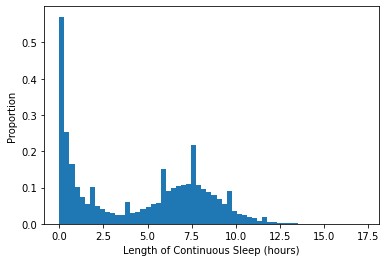

In [60]:
nighty_night = [i for i in lengths if i > 12.0]
plt.hist(np.array(lengths) / 4, bins=60, density = True)
plt.xlabel('Length of Continuous Sleep (hours)')
plt.ylabel('Proportion')

# show the plot
plt.show()

In [61]:
nighty_night = [i for i in lengths if i > 12.0]

In [62]:
np.mean(nighty_night)/4

7.304355580215599

In [63]:
np.var(nighty_night)/16

3.61799803114039

In [64]:
nappy_nap = [i for i in lengths if i < 12.0]

In [65]:
np.mean(nappy_nap)/4

0.8057544052863436

In [66]:
np.var(nappy_nap)/16

0.49044183175372125

In [67]:
np.mean(lengths)/4

4.570938999314599

In [68]:
np.var(lengths)/16

12.499394206240078

In [74]:
labelled_data = labelled_data.reset_index()
labelled_data

,Student ID,Datetime,Steps,Asleep
0,0,2021-10-01 00:00:00,0,0
1,0,2021-10-01 00:15:00,107,0
2,0,2021-10-01 00:30:00,18,0
3,0,2021-10-01 00:45:00,73,0
4,0,2021-10-01 01:00:00,10,0
...,...,...,...,...
297595,99,2021-10-31 22:45:00,56,0
297596,99,2021-10-31 23:00:00,450,0
297597,99,2021-10-31 23:15:00,56,0
297598,99,2021-10-31 23:30:00,11,0


In [75]:
unlabelled_lab = unlabelled_lab.reset_index()
unlabelled_lab

,index,Student ID,Datetime,Steps,Asleep
0,0,100,2021-10-01 00:00:00,67,0.0
1,1,100,2021-10-01 00:15:00,20,0.0
2,2,100,2021-10-01 00:30:00,0,0.0
3,3,100,2021-10-01 00:45:00,0,0.0
4,4,100,2021-10-01 01:00:00,3,0.0
...,...,...,...,...,...
1190395,1190395,499,2021-10-31 22:45:00,7,0.0
1190396,1190396,499,2021-10-31 23:00:00,41,0.0
1190397,1190397,499,2021-10-31 23:15:00,6,0.0
1190398,1190398,499,2021-10-31 23:30:00,5,0.0


In [76]:
def generate_starts(labelled_data):
  previous = 0.0
  starts = []
  #lengths = []
  #three_labels = []
  for index, row in labelled_data.iterrows():
    current = row['Asleep'] #name of the column of 
    if current == 1.0 and previous == 0.0:
      starts.append(index)
    #elif previous == 1.0 and current == 0.0:
    #  lengths.append(count)
      #if count <= 12:
      #  three_labels.extend([2.0]*int(count))
      #else:
      #  three_labels.extend([1.0]*int(count))
      #count = 0
    #if current == 0.0:
    #  three_labels.append(0.0)
    previous = current
  #plt.hist(lengths)
  return starts
starts_lab = generate_starts(labelled_data)
starts_unlab = generate_starts(unlabelled_lab)

In [78]:
len(starts_lab)

4411

In [79]:
starts_lab = np.mod(np.array(starts_lab), np.array([96]*len(starts_lab)))
starts_unlab = np.mod(np.array(starts_unlab), np.array([96]*len(starts_unlab)))

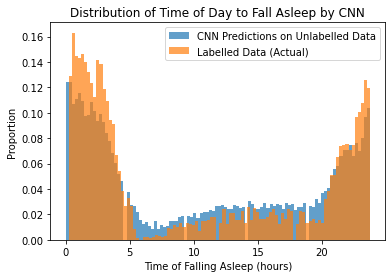

In [96]:
plt.hist(starts_unlab / 4, bins=100, density = True, alpha = 0.7, label = 'CNN Predictions on Unlabelled Data')
plt.hist(starts_lab / 4, bins=[0.24 * i for i in range(1,100)], density = True, alpha = 0.7, label = 'Labelled Data (Actual)')
plt.legend()
plt.title('Distribution of Time of Day to Fall Asleep by CNN')
plt.xlabel('Time of Falling Asleep (hours)')
plt.ylabel('Proportion')

# show the plot
plt.show()

(array([0.12448412, 0.12429172, 0.10678313, 0.11082358, 0.11582603,
        0.10889956, 0.09774024, 0.09793264, 0.10870715, 0.10120347,
        0.0938922 , 0.09927945, 0.09293019, 0.08427209, 0.07753802,
        0.06849513, 0.06060664, 0.05175615, 0.04636889, 0.        ,
        0.0375184 , 0.02712869, 0.02655148, 0.02174143, 0.01519976,
        0.01250613, 0.01423775, 0.01115932, 0.00827329, 0.01443015,
        0.00885049, 0.01173652, 0.0098125 , 0.01115932, 0.01481496,
        0.01462256, 0.01462256, 0.01770099, 0.0190478 , 0.        ,
        0.0190478 , 0.01770099, 0.02116422, 0.01731618, 0.02077942,
        0.02193383, 0.02193383, 0.02366545, 0.02289584, 0.02635908,
        0.02693629, 0.02712869, 0.02578187, 0.02405026, 0.02443506,
        0.02732109, 0.02635908, 0.02501227, 0.02616668, 0.        ,
        0.03078433, 0.0282831 , 0.02462746, 0.02443506, 0.02616668,
        0.0286679 , 0.02520467, 0.0280907 , 0.02655148, 0.0282831 ,
        0.02770589, 0.02443506, 0.02886031, 0.02

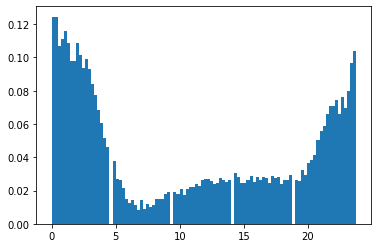

In [83]:
plt.hist(starts_unlab / 4, bins=100, density = True)